In [190]:
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
# import survey data file
df = pd.read_csv('data/library_survey_data.csv')

# change column names
"""
Details on the types of seats:
discussion_cubicles -> discussion cubicles at lvl 3
windowed -> windowed seats at lvl 5 and 6
diagonal -> diagonal seats at lvl 6
cubicle -> cubicle seats at lvl 6
4-man -> 4-man tables at lvl 5
8-man -> 8-man tables at lvl 5
soft -> soft seats at lvl 3 and 4
sofa -> sofa at lvl 3 and 4
moveable -> moveable seats at lvl 3
"""
df.columns = ['Datatime', 'visit_time', 'entry_lvl', 'visit_reason', 'year_of_study', 'usual_amt_time', 'exam_amt_time', 'lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding', 'acceptance_alternate_seat', 'most_crowded_lvl', 'lunch_time', 'group_size', 'acceptance_share_table', 'printer_only_frequency', 'hogging_duration', 'hogging_reason']



In [192]:
# fill NA with 3 (neutral) for those that leave blank for rating
columns_to_fillna = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate', 'privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate', 'discussion_cubicles_rate', 'discussion_cubicles_privacy', 'discussion_cubicles_crowd', 'discussion_cubicles_comfort', 'discussion_cubicles_scenery', 'discussion_cubicles_lighting', 'discussion_cubicles_seat_finding', 'windowed_rate', 'windowed_privacy', 'windowed_crowd', 'windowed_comfort', 'windowed_scenery', 'windowed_lighting', 'windowed_seat_finding', 'diagonal_rate', 'diagonal_privacy', 'diagonal_crowd', 'diagonal_comfort', 'diagonal_scenery', 'diagonal_lighting', 'diagonal_seat_finding', 'cubicle_rate', 'cubicle_privacy', 'cubicle_crowd', 'cubicle_comfort', 'cubicle_scenery', 'cubicle_lighting', 'cubicle_seat_finding', '4-man_rate', '4-man_privacy', '4-man_crowd', '4-man_comfort', '4-man_scenery', '4-man_lighting', '4-man_seat_finding', '8-man_rate', '8-man_privacy', '8-man_crowd', '8-man_comfort', '8-man_scenery', '8-man_lighting', '8-man_seat_finding', 'soft_rate', 'soft_privacy', 'soft_crowd', 'soft_comfort', 'soft_scenery', 'soft_lighting', 'soft_seat_finding', 'sofa_rate', 'sofa_privacy', 'sofa_crowd', 'sofa_comfort', 'sofa_scenery', 'sofa_lighting', 'sofa_seat_finding', 'moveable_rate', 'moveable_privacy', 'moveable_crowd', 'moveable_comfort', 'moveable_scenery', 'moveable_lighting', 'moveable_seat_finding']
df[columns_to_fillna] = df[columns_to_fillna].fillna(value='3')


# fill NA with neutral for those that leave blank for acceptance_share_table 
df['acceptance_share_table'] = df['acceptance_share_table'].fillna(value='neutral')

# convert all to lower case 
df = df.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'O' else x)
 
# remove results where people do not visit library (visit_time does not contain am or pm)
df = df[df['visit_time'].str.contains('AM|PM', case=False, na=False, regex=True)]

# make all numeric for ratings
df[columns_to_fillna] = df[columns_to_fillna].replace('1 - least preferred', '1')
df[columns_to_fillna] = df[columns_to_fillna].replace('5 - most preferred', '5')
for col in columns_to_fillna:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df






,Datatime,visit_time,entry_lvl,visit_reason,year_of_study,usual_amt_time,exam_amt_time,lvl3_rate,lvl4_rate,lvl5_rate,...,moveable_lighting,moveable_seat_finding,acceptance_alternate_seat,most_crowded_lvl,lunch_time,group_size,acceptance_share_table,printer_only_frequency,hogging_duration,hogging_reason
0,18/10/2023 17:22:19,"11am, 2pm","level 1, level 4",study (long period),year 3,4 hrs,6 hrs,2,3,3,...,3.0,3.0,yes,level 6,12-1pm,2-3 pax,neutral,never,leave my belongings and go for lessons. (1hr-2hr),chopping seats cause will study for a very lon...
1,18/10/2023 18:20:35,1pm,level 4,study (short period i.e. kill time between cla...,year 3,4 hrs,less than 2hrs,2,3,3,...,3.0,3.0,yes,level 4,12-1pm,1 pax,no,never,leave my belongings and go for lunch. (30min-1hr),friends chopping seats for friends who cmg late
2,23/10/2023 11:13:44,10am,level 4,study (short period i.e. kill time between cla...,year 3,up to 1 hour,up to 1 hour,2,3,1,...,3.0,2.0,yes,level 4,11-12pm,alone,maybe,never,i take my belongings everytime i leave,chopping seats cause will study for a very lon...
3,23/10/2023 11:25:02,"2pm, 3pm, 6pm","level 1, level 4",study (short period i.e. kill time between cla...,year 3,up to 2 hours,up to 4 hours,3,2,5,...,3.0,4.0,yes,l6 – central library,12-1pm,alone,share a table with a stranger,never,leave my belongings and go for lunch. (30min-1hr),"no, first come first serve and can only leave ..."
4,23/10/2023 11:56:49,11am,level 4,study (long period),year 2,up to 6 hours,up to 1 hour,4,4,4,...,4.0,4.0,yes,level 5,11-12pm,2-3 pax,neutral,never,leave my belongings and go for lunch. (30min-1hr),chopping seats for friends who are coming late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26/10/2023 21:24:58,11am,level 1,study (short period i.e. kill time between cla...,general public,up to 4 hours,up to 4 hours,3,3,3,...,1.0,1.0,yes,level 3,12-1pm,2-3 pax,neutral,never,i take my belongings everytime i leave,"no, first come first serve and can only leave ..."
243,26/10/2023 21:53:31,"10am, 11am, 12pm, 1pm, 2pm, 3pm, 4pm, 5pm","level 1, level 4",study (long period),year 3,up to 4 hours,up to 6 hours,3,4,2,...,5.0,3.0,yes,l6 – central library,11-12pm,2-3 pax,look for a seat outside the library,never,leave my belongings and go for lunch. (30min-1hr),chopping seats because they will study for a v...
244,26/10/2023 22:16:36,10am,level 4,napping,year 4/final year,up to 6 hours,up to 6 hours,1,2,3,...,2.0,4.0,yes,level 5,12-1pm,2-3 pax,neutral,once a month,i usually chope a seat for the whole day.,chopping seats for friends who are coming late
245,26/10/2023 22:59:09,"3pm, 4pm, 5pm",level 1,study (short period i.e. kill time between cla...,graduate,up to 2 hours,up to 4 hours,3,3,5,...,3.0,1.0,yes,l6 – chinese library,1-2pm,alone,share a table with a stranger,never,leave my belongings and go for lunch. (30min-1hr),chopping seats because they will study for a v...


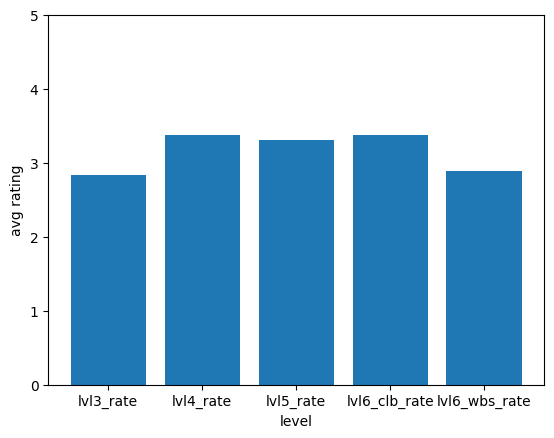

In [193]:
# visualise avg ratings for each level
rating_columns = ['lvl3_rate', 'lvl4_rate', 'lvl5_rate', 'lvl6_clb_rate', 'lvl6_wbs_rate']
lvl_avg = df[rating_columns].mean()

plt.bar(rating_columns,lvl_avg)
plt.xlabel('level')
plt.ylabel('avg rating')
plt.ylim(0, 5)
plt.show()

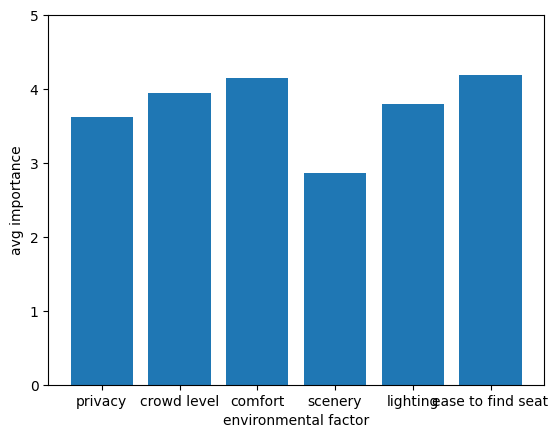

In [194]:
# visualise importance of each environmental component

env_rating = ['privacy_rate', 'crowd_lvl_rate', 'comfort_rate', 'scenery_rate', 'lighting_rate', 'ease_find_seat_rate']
env_avg = df[env_rating].mean()

plt.bar(['privacy', 'crowd level', 'comfort', 'scenery', 'lighting', 'ease to find seat'],env_avg)
plt.xlabel('environmental factor')
plt.ylabel('avg importance')
plt.ylim(0,5)
plt.show()


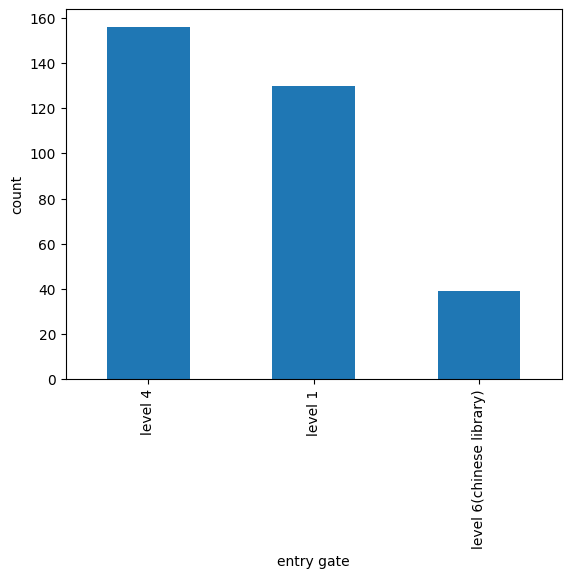

In [195]:
# visualise distribution of starting gate from survey

gate_counts = df['entry_lvl'].str.split(', ').explode().value_counts()

gate_counts.plot(kind='bar')
plt.xlabel('entry gate')
plt.ylabel('count')
plt.show()
